In [1]:
## DMW A1: Data Preprocessing
## Aditya Agre TYCOA6

## Data set : movies.csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('movies2.csv')
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,-2021,"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","8,85,805",44.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","4,14,849",23.0
4,Army of Thieves,-2021,"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN
...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN


In [4]:
## 5) Going through all measures of central tendency

In [5]:
## Studying modal values per column
df.mode(axis = 0)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Bleach: Burîchi,(2020– ),\nComedy,7.2,\nAdd a Plot\n,\n,7,24.0


In [6]:
## Studying mean values per column
df.mean()

/var/folders/ft/m0h88bl55gl0qmgjxz9qczfc0000gn/T/ipykernel_4020/2762134590.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


RATING      6.921176
RunTime    68.688539
dtype: float64

In [7]:
## Studying median values per column
df.median()

/var/folders/ft/m0h88bl55gl0qmgjxz9qczfc0000gn/T/ipykernel_4020/1181268256.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


RATING      7.1
RunTime    60.0
dtype: float64

In [8]:
## Handling Missing Values

In [9]:
## which of these columns have null values

no_of_col = df.shape[1]

for i in range(no_of_col):
    if(df[:i].isnull().values.any()):
        print("Col ",i," has null values.")

Col  5  has null values.
Col  6  has null values.
Col  7  has null values.


In [10]:
## Checking number of null entries per column.
df.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
dtype: int64

In [11]:
# RunTime has null values.
# It is also a numerical column
# So we can replace the null values with the median

df['RunTime'] = df['RunTime'].fillna(df['RunTime'].median())
df
## As you can see the RunTime column now doesnt show any null values like before.
## All the null values have been replaced with mode value 24

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,-2021,"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","8,85,805",44.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","4,14,849",23.0
4,Army of Thieves,-2021,"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,60.0
...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,60.0
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,60.0
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,60.0
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,60.0


In [12]:
# Similarly:
df['RATING'].replace(np.NaN, df['RATING'].mode()[0],inplace=True)
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,-2021,"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","8,85,805",44.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","4,14,849",23.0
4,Army of Thieves,-2021,"\nAction, Crime, Horror",7.2,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,60.0
...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",7.2,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,60.0
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",7.2,\nAdd a Plot\n,\n,NaN,60.0
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",7.2,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,60.0
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",7.2,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,60.0


In [13]:
# Similarly:
df['YEAR'].replace(np.NaN, df['YEAR'].mode()[0],inplace=True)
df


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,-2021,"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","8,85,805",44.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","4,14,849",23.0
4,Army of Thieves,-2021,"\nAction, Crime, Horror",7.2,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,60.0
...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",7.2,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,60.0
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",7.2,\nAdd a Plot\n,\n,NaN,60.0
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",7.2,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,60.0
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",7.2,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,60.0


In [14]:
# Similarly:
df['VOTES'].replace(np.NaN, df['VOTES'].mode()[0],inplace=True)
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,-2021,"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","8,85,805",44.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","4,14,849",23.0
4,Army of Thieves,-2021,"\nAction, Crime, Horror",7.2,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,7,60.0
...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",7.2,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,7,60.0
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",7.2,\nAdd a Plot\n,\n,7,60.0
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",7.2,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,7,60.0
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",7.2,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,7,60.0


In [15]:
df.isnull().sum()

MOVIES       0
YEAR         0
GENRE       80
RATING       0
ONE-LINE     0
STARS        0
VOTES        0
RunTime      0
dtype: int64

In [16]:
# Genre is a non-numerical datatype
# 80 entries have null genre

# Removing these entries

df.dropna(subset=['GENRE'], inplace=True)
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,-2021,"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","8,85,805",44.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","4,14,849",23.0
4,Army of Thieves,-2021,"\nAction, Crime, Horror",7.2,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,7,60.0
...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",7.2,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,7,60.0
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",7.2,\nAdd a Plot\n,\n,7,60.0
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",7.2,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,7,60.0
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",7.2,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,7,60.0


In [17]:
df.isnull().sum()

MOVIES      0
YEAR        0
GENRE       0
RATING      0
ONE-LINE    0
STARS       0
VOTES       0
RunTime     0
dtype: int64

In [18]:
# No more NULL values

In [19]:
## Removal of duplicates

In [20]:
# Now lets handle the duplicates

df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,-2021,"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","8,85,805",44.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","4,14,849",23.0
4,Army of Thieves,-2021,"\nAction, Crime, Horror",7.2,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,7,60.0
...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",7.2,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,7,60.0
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",7.2,\nAdd a Plot\n,\n,7,60.0
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",7.2,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,7,60.0
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",7.2,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,7,60.0


In [21]:
# We currently have 9919 rows
# Lets look at the duplicate rows now
df[df.duplicated(keep='first')]

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
6833,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",7.2,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",7,60.0
6835,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",9.0,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",6,60.0
6836,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",9.0,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",6,60.0
6837,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",7.2,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",7,60.0
6838,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",7.2,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",7,60.0
...,...,...,...,...,...,...,...,...
9989,1899,(2022– ),"\nDrama, History, Horror",7.2,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,7,60.0
9990,1899,(2022– ),"\nDrama, History, Horror",7.2,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,7,60.0
9991,1899,(2022– ),"\nDrama, History, Horror",7.2,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,7,60.0
9992,1899,(2022– ),"\nDrama, History, Horror",7.2,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,7,60.0


In [22]:
## 429 repeating rows

# Removing these rows
df.drop_duplicates(keep='first', inplace=True)
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,-2021,"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","8,85,805",44.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","4,14,849",23.0
4,Army of Thieves,-2021,"\nAction, Crime, Horror",7.2,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,7,60.0
...,...,...,...,...,...,...,...,...
9993,Totenfrau,(2022– ),"\nDrama, Thriller",7.2,\nAdd a Plot\n,\n Director:\nNicolai Rohde\n| \n Stars:...,7,60.0
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",7.2,\nAdd a Plot\n,\n,7,60.0
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",7.2,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,7,60.0
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",7.2,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,7,60.0


In [23]:
df.shape[0]

9490

In [24]:
# 9490 rows left


In [25]:
## data has not been arranged according to any pattern
## Yet, we are shuffling 

df = df.sample(frac=1, random_state=42)
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
2211,The Numbers Station,-2013,"\nAction, Thriller",5.6,\nA disgraced black ops agent is dispatched to...,\n Director:\nKasper Barfoed\n| \n Stars...,"19,590",89.0
2908,The Stranded,(2019– ),"\nAdventure, Drama, Mystery",6.3,\nWhen a tsunami strands dozens of teens on an...,\n \n Stars:\nPapangkorn Lerkcha...,"1,081",40.0
1530,Spaceman of Bohemia,(2020– ),"\nAdventure, Drama, Sci-Fi",7.2,"\nJakub Procházka, who orphaned as a boy and r...",\n Director:\nJohan Renck\n| \n Stars:\n...,7,60.0
6542,Avatar: The Last Airbender,(2005–2008),"\nAnimation, Action, Adventure",9.1,Aang relives the events after finding out that...,\n Director:\nLauren MacMullan\n| \n Sta...,"3,555",25.0
4080,Les gars sûrs,-2022,"\nAction, Comedy",7.2,"Plot Unknown, Sequel of De l'autre côté du pér...",\n Director:\nLouis Leterrier\n| \n Star...,7,60.0
...,...,...,...,...,...,...,...,...
5761,Ralphie May: Unruly,(2015 Video),\nComedy,4.8,"\nFilmed in front of a raucous crowd, comedian...",\n Director:\nJohn Asher\n| \n Star:\nRa...,380,83.0
5204,Jeff Dunham: Relative Disaster,(2017 TV Special),\nComedy,6.4,"\nWelcome to Ireland, where Ventriloquist Jeff...","\n Directors:\nMichael Simon, \nMatthew McN...","1,211",70.0
5409,Colin Quinn: The New York Story,(2016 TV Special),\nComedy,6.8,\nColin Quinn discusses the origins of New Yor...,\n Director:\nJerry Seinfeld\n| \n Star:...,949,62.0
860,The Infiltrator,-2016,"\nBiography, Crime, Drama",7.0,\nA U.S. Customs official uncovers a money lau...,\n Director:\nBrad Furman\n| \n Stars:\n...,"70,858",127.0


In [26]:
## Normalising Data using min max scaling

array([[<AxesSubplot:title={'center':'RATING'}>,
        <AxesSubplot:title={'center':'RunTime'}>]], dtype=object)

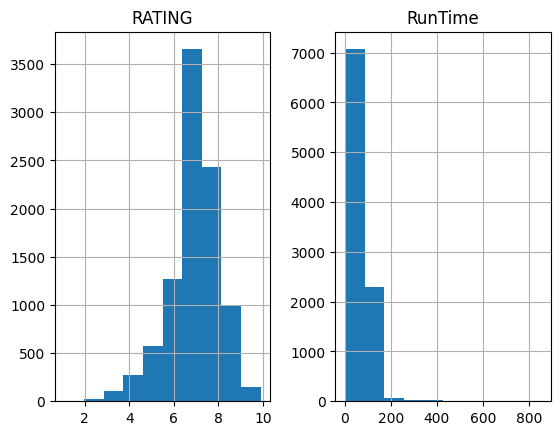

In [27]:
## PLotting histogram

df.hist()

<AxesSubplot:>

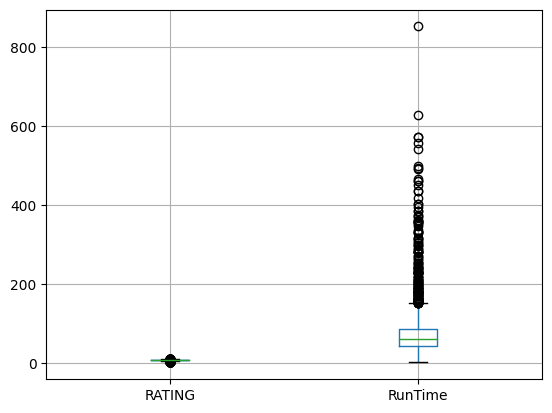

In [28]:
## Plotting boxplot

df.boxplot()

In [29]:
# Boxplot shows many outliers



# lets make a general func that removes outliers for a given column

In [30]:
def outlier_remove(col_i):
    ## Lets follow inter quartile range method
    ## return the values of the lower range limit and upper range limit
    ## these limits have values 1.5*(inter quartile range beyond) first and third quartiles.
    
    ## To find quartiles, we must sort the column
    sorted(col_i)
    
    Q1,Q3 = np.percentile(col_i , [25,75]) 
    ## because we are taking quartiles. therefore 25% and 75%
    inter_q_range = Q3-Q1
    
    l_lim = Q1 - (1.5 * inter_q_range)
    up_lim = Q3 + (1.5 * inter_q_range)
    return l_lim,up_lim, Q1,Q3, inter_q_range


    
    

In [31]:
l,u,q1,q3,iqr=outlier_remove(df.RunTime)
print(l,u,q1,q3,iqr)

rows = df.shape[0]

df.drop(df[(df.RunTime < l) | (df.RunTime > u)].index,inplace=True)

-20.5 151.5 44.0 87.0 43.0


In [32]:
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
2211,The Numbers Station,-2013,"\nAction, Thriller",5.6,\nA disgraced black ops agent is dispatched to...,\n Director:\nKasper Barfoed\n| \n Stars...,"19,590",89.0
2908,The Stranded,(2019– ),"\nAdventure, Drama, Mystery",6.3,\nWhen a tsunami strands dozens of teens on an...,\n \n Stars:\nPapangkorn Lerkcha...,"1,081",40.0
1530,Spaceman of Bohemia,(2020– ),"\nAdventure, Drama, Sci-Fi",7.2,"\nJakub Procházka, who orphaned as a boy and r...",\n Director:\nJohan Renck\n| \n Stars:\n...,7,60.0
6542,Avatar: The Last Airbender,(2005–2008),"\nAnimation, Action, Adventure",9.1,Aang relives the events after finding out that...,\n Director:\nLauren MacMullan\n| \n Sta...,"3,555",25.0
4080,Les gars sûrs,-2022,"\nAction, Comedy",7.2,"Plot Unknown, Sequel of De l'autre côté du pér...",\n Director:\nLouis Leterrier\n| \n Star...,7,60.0
...,...,...,...,...,...,...,...,...
5761,Ralphie May: Unruly,(2015 Video),\nComedy,4.8,"\nFilmed in front of a raucous crowd, comedian...",\n Director:\nJohn Asher\n| \n Star:\nRa...,380,83.0
5204,Jeff Dunham: Relative Disaster,(2017 TV Special),\nComedy,6.4,"\nWelcome to Ireland, where Ventriloquist Jeff...","\n Directors:\nMichael Simon, \nMatthew McN...","1,211",70.0
5409,Colin Quinn: The New York Story,(2016 TV Special),\nComedy,6.8,\nColin Quinn discusses the origins of New Yor...,\n Director:\nJerry Seinfeld\n| \n Star:...,949,62.0
860,The Infiltrator,-2016,"\nBiography, Crime, Drama",7.0,\nA U.S. Customs official uncovers a money lau...,\n Director:\nBrad Furman\n| \n Stars:\n...,"70,858",127.0


<AxesSubplot:>

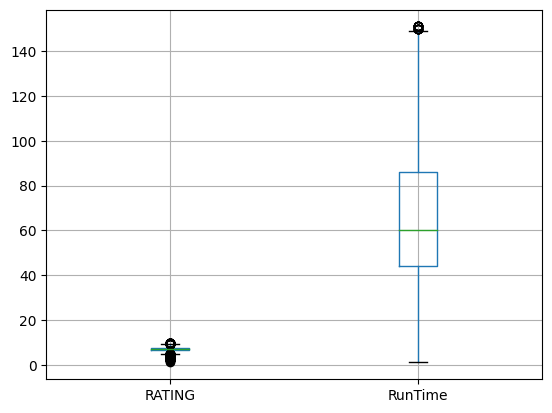

In [33]:
## Therefore outliers removed

df.boxplot()

array([[<AxesSubplot:title={'center':'RATING'}>,
        <AxesSubplot:title={'center':'RunTime'}>]], dtype=object)

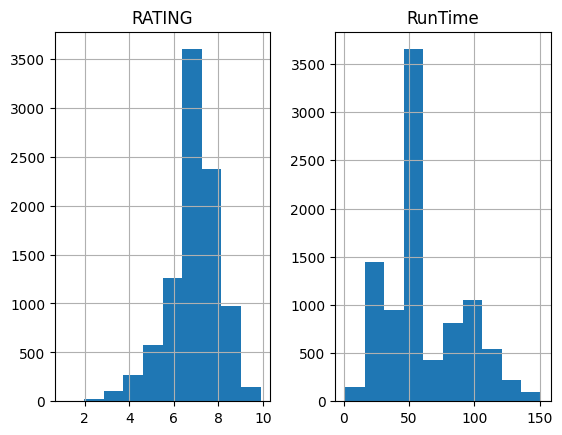

In [34]:
df.hist()

In [35]:
# Scaling


In [36]:
from sklearn.preprocessing import MinMaxScaler

MMscaler = MinMaxScaler()
## We have created an object of minmax scaler class

In [37]:
df_ncol= df.select_dtypes(exclude=['object'])
df_ncol
## We are doing this to extract onlythe numeric cols
## A new dataframe is being created with just these cols

,RATING,RunTime
2211,5.6,89.0
2908,6.3,40.0
1530,7.2,60.0
6542,9.1,25.0
4080,7.2,60.0
...,...,...
5761,4.8,83.0
5204,6.4,70.0
5409,6.8,62.0
860,7.0,127.0


In [38]:
type(df_ncol)

pandas.core.frame.DataFrame

In [39]:
df_ncol.columns # to get column headers

Index(['RATING', 'RunTime'], dtype='object')

In [40]:
## Making a copy of df
temp = df

# Scalable columns
cols= df_ncol.columns

## Performing min max scalning
temp[cols]=  MMscaler.fit_transform(df[cols])

In [41]:
temp

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
2211,The Numbers Station,-2013,"\nAction, Thriller",0.511364,\nA disgraced black ops agent is dispatched to...,\n Director:\nKasper Barfoed\n| \n Stars...,"19,590",0.586667
2908,The Stranded,(2019– ),"\nAdventure, Drama, Mystery",0.590909,\nWhen a tsunami strands dozens of teens on an...,\n \n Stars:\nPapangkorn Lerkcha...,"1,081",0.260000
1530,Spaceman of Bohemia,(2020– ),"\nAdventure, Drama, Sci-Fi",0.693182,"\nJakub Procházka, who orphaned as a boy and r...",\n Director:\nJohan Renck\n| \n Stars:\n...,7,0.393333
6542,Avatar: The Last Airbender,(2005–2008),"\nAnimation, Action, Adventure",0.909091,Aang relives the events after finding out that...,\n Director:\nLauren MacMullan\n| \n Sta...,"3,555",0.160000
4080,Les gars sûrs,-2022,"\nAction, Comedy",0.693182,"Plot Unknown, Sequel of De l'autre côté du pér...",\n Director:\nLouis Leterrier\n| \n Star...,7,0.393333
...,...,...,...,...,...,...,...,...
5761,Ralphie May: Unruly,(2015 Video),\nComedy,0.420455,"\nFilmed in front of a raucous crowd, comedian...",\n Director:\nJohn Asher\n| \n Star:\nRa...,380,0.546667
5204,Jeff Dunham: Relative Disaster,(2017 TV Special),\nComedy,0.602273,"\nWelcome to Ireland, where Ventriloquist Jeff...","\n Directors:\nMichael Simon, \nMatthew McN...","1,211",0.460000
5409,Colin Quinn: The New York Story,(2016 TV Special),\nComedy,0.647727,\nColin Quinn discusses the origins of New Yor...,\n Director:\nJerry Seinfeld\n| \n Star:...,949,0.406667
860,The Infiltrator,-2016,"\nBiography, Crime, Drama",0.670455,\nA U.S. Customs official uncovers a money lau...,\n Director:\nBrad Furman\n| \n Stars:\n...,"70,858",0.840000


In [42]:
## RunTime and rating have now been chaged to values between 0 and 1


In [43]:
## Therefore, data has been preprocessed by handling missing values, duplicate values, normalization by using central tendencies of data.